# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.

__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете.

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.

Good luck & have fun! :)

In [1]:
!pip install wandb --quiet
!pip3 install pytorch_lightning torchmetrics --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.6/248.6 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 13.8 MB/s eta 0:00:00


**✨ Внимание ✨**

В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:

1. Получить к ней доступ с помощью VPN.

2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:

```shell
git submodule update --init --recursive
make docs
```
После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).

3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉

4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [ ]:
#b5ee14ffb7fbbcfae87b62e6b507cbc208dc95cf

In [2]:
# Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки
import wandb

wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [3]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm

from IPython.display import clear_output
from pytorch_lightning.callbacks import ModelCheckpoint

# You may add any imports you need

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(123456)

In [6]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip

--2023-11-18 15:53:38--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/33l8lp62rmvtx40/dataset.zip [following]
--2023-11-18 15:53:38--  https://www.dropbox.com/s/dl/33l8lp62rmvtx40/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3a6ca01fcd32f5165ab1a2df01.dl.dropboxusercontent.com/cd/0/get/CHwESNvNJ3ZWqgEQC11oXG1QoteZHyoQgSFL1uUFoeSj9ZGCyCO_fGKVW63tnjxlMI1jQqc1YWscJUSuuKocB_hv2wwdtI55NmYDu_rQxJklfxpP5bPfM0w44T75VguKRIalVcoZPPbH50VdKI73IRey/file?dl=1# [following]
--2023-11-18 15:53:39--  https://uc3a6ca01fcd32f5165ab1a2df01.dl.dropboxusercontent.com/cd/0/get/CHwESNvNJ3ZWqgEQC11oXG1QoteZHyoQgSFL1uUFoeSj9ZGCyCO_fGKVW63tnjxlMI1jQqc1YWscJUSuuKocB_hv2wwdtI55NmYDu_r

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True)

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели.
5. Можно написать модель руками свою в YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать:

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали.
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [7]:
train_transform = transforms.Compose([
        transforms.ColorJitter(brightness=.05, hue=.05),
        transforms.RandomRotation(10),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
    ])

val_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
    ])

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=256, num_workers=1)
val_dataloader = DataLoader(val_dataset, shuffle=False, batch_size=256, num_workers=1)

In [ ]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

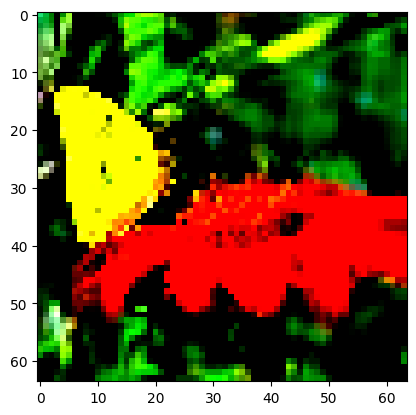

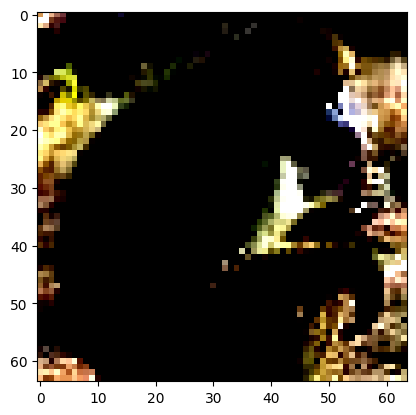

In [ ]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[22].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[222].permute(1, 2, 0))
    plt.show()
    break

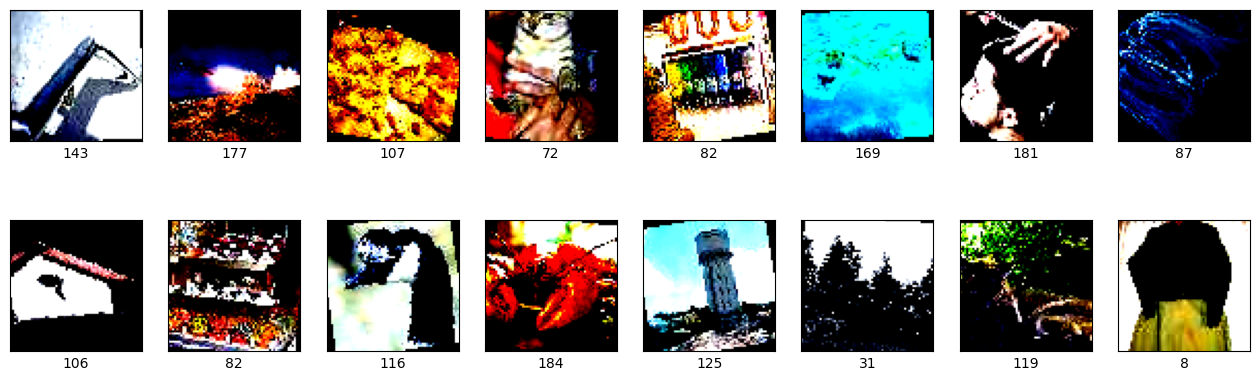

In [ ]:
# Код из ноутбучка к 3-му семинару группы 10 для визуализации сразу нескольких картинок

cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols, 2.5 * rows))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(train_dataset))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        # Заменяем reshape на permute чтобы избавиться от ошибки invalid shape [3, 64, 64] for image data
        # https://stackoverflow.com/questions/61480762/python-matplotlib-invalid-shape-for-image-data
        ax.imshow(train_dataset[random_index][0].squeeze(0).permute(1, 2, 0) , cmap='gray')
        ax.set_xlabel(train_dataset[random_index][1])

# Убираем ворнинги, вызванные тем, что я хочу вывести нормализованные вектора картинок
# https://stackoverflow.com/questions/49643907/clipping-input-data-to-the-valid-range-for-imshow-with-rgb-data-0-1-for-floa
clear_output()
plt.show()

## Задание 1.

5 баллов
Добейтесь accuracy на валидации не менее 0.44. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

In [8]:
# https://stackoverflow.com/questions/63367995/how-to-use-model-architecture-of-pretrained-models-but-no-weights
# Model = models.resnet50(weights=None, num_classes=200)
Model = models.resnet18(weights=None, num_classes=200)
# Model = models.resnet34(weights=None,  num_classes=200)
# Model = models.swin_v2_t(weights=None, num_classes=200)

### Тренировочный класс lightning

In [9]:
class Module(pl.LightningModule):
    def __init__(self, model, learning_rate=0.0012):
        super().__init__()

        self.model = model
        self.learning_rate = learning_rate
        self.loss = nn.CrossEntropyLoss()

    def forward(self, x):
        return self.model(x)

    def configure_optimizers(self):
      # https://github.com/Lightning-AI/lightning/issues/3795
        optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)
        # optimizer = torch.optim.RMSprop(self.model.parameters(), lr=self.learning_rate)
        # scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer)
        scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)

        return [optimizer], [{'scheduler': scheduler}]#, 'monitor': 'val_loss'}]

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log('train_loss', loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        acc = accuracy(torch.argmax(preds, dim=-1).long(), target.long(),
                       task='multiclass', num_classes=200)
        self.log('val_loss', loss, prog_bar=True)
        self.log('accuracy', acc, prog_bar=True)

In [10]:
wandb_logger = WandbLogger(log_model='all', project='hw2t1')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = Model.to(device)
module = Module(model)

### Лучшая модель

In [ ]:
# resnet18, Adam, cos, .0012
checkpoint_callback = ModelCheckpoint(
    dirpath='/content/drive/MyDrive/checkpoints/task1',
    filename='model-{epoch}-{accuracy:.3f}-',
    monitor='accuracy',
    mode='max',
    save_top_k=3
    )

trainer = pl.Trainer(max_epochs=12, logger=wandb_logger, callbacks=[checkpoint_callback])
trainer.fit(module, train_dataloader, val_dataloader)

wandb.finish()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | ResNet           | 11.3 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=12` reached.


accuracy,▁▃▄▅▆▆▇█████
epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇███
train_loss,█▇▆▆▆▆▅▅▅▄▄▄▄▄▃▄▄▃▄▃▃▃▂▂▂▂▂▂▂▂▁▁▁▂▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
val_loss,█▅▅▃▃▂▂▁▁▁▁▁
accuracy,0.418
epoch,11
train_loss,1.53696
trainer/global_step,4691
val_loss,2.50773


### Эксперименты

In [ ]:
# resnet18, Adam, no sch, .001
checkpoint_callback = ModelCheckpoint(
    dirpath='/content/drive/MyDrive/checkpoints/task1',
    filename='model-{epoch}-{accuracy:.3f}-',
    monitor='accuracy',
    mode='max',
    save_top_k=3
    )

trainer = pl.Trainer(max_epochs=12, logger=wandb_logger, callbacks=[checkpoint_callback])
trainer.fit(module, train_dataloader, val_dataloader)

wandb.finish()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | ResNet           | 11.3 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=12` reached.


accuracy,▁▃▄▅▆▇▇▇████
epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇███
train_loss,█▇▆▅▆▅▅▅▅▅▄▄▄▄▄▄▄▃▄▃▃▃▃▂▃▃▃▂▂▂▂▂▂▃▂▂▂▂▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
val_loss,█▅▄▄▂▂▁▁▁▁▁▂
accuracy,0.3804
epoch,11
train_loss,1.42511
trainer/global_step,4691
val_loss,2.92574


In [ ]:
# Adam, cos scheduler, no complex augmentation
checkpoint_callback = ModelCheckpoint(
    dirpath='/content/drive/MyDrive/checkpoints/task1',
    filename='model-{epoch}-{accuracy:.3f}-',
    monitor='accuracy',
    mode='max',
    save_top_k=3
    )

trainer = pl.Trainer(max_epochs=12, logger=wandb_logger, callbacks=[checkpoint_callback])
trainer.fit(module, train_dataloader, val_dataloader)

wandb.finish()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
wandb: Currently logged in as: sashullel (sashullelteam). Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:634: Checkpoint directory /content/drive/MyDrive/checkpoints/task1 exists and is not empty.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | ResNet           | 11.3 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=12` reached.


accuracy,▁▄▆▇▇███████
epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇███
train_loss,█▇▆▆▅▅▅▄▄▄▃▄▄▃▃▃▃▂▂▂▂▂▂▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
val_loss,█▅▃▂▂▁▁▁▁▁▁▁
accuracy,0.2887
epoch,11
train_loss,2.132
trainer/global_step,4691
val_loss,3.13692


In [ ]:
# Adam, plateau scheduler, no complex augmentation
checkpoint_callback = ModelCheckpoint(
    dirpath='/content/drive/MyDrive/checkpoints/task1',
    filename='model-{epoch}-{accuracy:.3f}-',
    monitor='accuracy',
    mode='max',
    save_top_k=3
    )

trainer = pl.Trainer(max_epochs=12, logger=wandb_logger, callbacks=[checkpoint_callback])
trainer.fit(module, train_dataloader, val_dataloader)

wandb.finish()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loggers/wandb.py:389: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | ResNet           | 11.3 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
# Adam, cos scheduler
checkpoint_callback = ModelCheckpoint(
    dirpath='/content/drive/MyDrive/checkpoints/task1',
    filename='model-{epoch}-{accuracy:.3f}-',
    monitor='accuracy',
    mode='max',
    save_top_k=3
    )

trainer = pl.Trainer(max_epochs=12, logger=wandb_logger, callbacks=[checkpoint_callback])
trainer.fit(module, train_dataloader, val_dataloader)

wandb.finish()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | ResNet           | 11.3 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=12` reached.


accuracy,▁▃▄▆▆▇▇██████
epoch,▁▁▁▁▁▁▂▂▂▂▂▂▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇███
train_loss,█▇▆▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▃▂▂▂▂▂▂▁▂▂▁▁▂▁▁▂▁▂▁▁▁▁
trainer/global_step,▁▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇███
val_loss,█▅▄▃▂▂▂▁▁▁▁▁▁
accuracy,0.3121
epoch,11
train_loss,2.44353
trainer/global_step,4691
val_loss,3.0


In [ ]:
# Adam, plateau scheduler
checkpoint_callback = ModelCheckpoint(
    dirpath='/content/drive/MyDrive/checkpoints/task1',
    filename='model-{epoch}-{accuracy:.3f}-',
    monitor='accuracy',
    mode='max',
    save_top_k=3
    )

trainer = pl.Trainer(max_epochs=10, logger=wandb_logger, callbacks=[checkpoint_callback])
trainer.fit(module, train_dataloader, val_dataloader)

wandb.finish()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | ResNet           | 11.3 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


accuracy,▁▃▅▅▆▇▇███
epoch,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇████
train_loss,██▇▆▆▅▅▅▄▄▄▄▃▄▄▄▃▃▃▃▃▂▂▃▂▃▂▂▂▂▂▂▂▁▂▂▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
val_loss,█▅▄▃▂▂▂▁▁▁
accuracy,0.3148
epoch,9
train_loss,2.50699
trainer/global_step,3909
val_loss,2.9683


In [ ]:
# RMSprop, cos scheduler
checkpoint_callback = ModelCheckpoint(
    dirpath='/content/drive/MyDrive/checkpoints/task1',
    filename='model-{epoch}-{accuracy:.3f}-',
    monitor='accuracy',
    mode='max',
    save_top_k=3
    )

trainer = pl.Trainer(max_epochs=12, logger=wandb_logger, callbacks=[checkpoint_callback])
trainer.fit(module, train_dataloader, val_dataloader)

wandb.finish()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
wandb: Currently logged in as: sashullel (sashullelteam). Use `wandb login --relogin` to force relogin


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | ResNet           | 11.3 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=12` reached.


accuracy,▁▃▅▅▆▇██████
epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇███
train_loss,█▇▆▆▅▅▄▄▄▄▄▄▃▃▃▃▃▃▃▃▂▂▃▂▂▂▃▂▂▂▁▂▁▂▂▂▁▁▂▂
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
val_loss,█▆▄▃▃▂▁▁▁▁▁▁
accuracy,0.3023
epoch,11
train_loss,2.69557
trainer/global_step,4691
val_loss,3.05865


In [ ]:
# RMSprop, plateau scheduler
checkpoint_callback = ModelCheckpoint(
    dirpath='/content/drive/MyDrive/checkpoints/task1',
    filename='model-{epoch}-{accuracy:.3f}-',
    monitor='accuracy',
    mode='max',
    save_top_k=3
    )

trainer = pl.Trainer(max_epochs=12, logger=wandb_logger, callbacks=[checkpoint_callback])
trainer.fit(module, train_dataloader, val_dataloader)

wandb.finish()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:634: Checkpoint directory /content/checkpoints/task1 exists and is not empty.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | ResNet           | 11.3 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=12` reached.


accuracy,▁▃▄▅▅▆▇▇████
epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇███
train_loss,█▇▇▆▆▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▃▂▂▃▃▂▂▂▂▂▂▂▁▁▂▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
val_loss,█▆▄▄▃▂▂▁▁▁▁▂
accuracy,0.3022
epoch,11
train_loss,2.14309
trainer/global_step,4691
val_loss,3.15485


In [ ]:
# RMSprop, no scheduler
checkpoint_callback = ModelCheckpoint(
    dirpath='/content/drive/MyDrive/checkpoints/task1',
    filename='model-{epoch}-{accuracy:.3f}-',
    monitor='accuracy',
    mode='max',
    save_top_k=3
    )

trainer = pl.Trainer(max_epochs=12, logger=wandb_logger, callbacks=[checkpoint_callback])
trainer.fit(module, train_dataloader, val_dataloader)

wandb.finish()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | ResNet           | 11.3 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=12` reached.


accuracy,▁▃▄▅▆▆▇▇▇███
epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇███
train_loss,█▇▇▆▆▅▅▅▄▄▄▄▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▁▂▂▃▂▁▂▁▂▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
val_loss,█▆▄▄▃▂▂▂▁▁▁▂
accuracy,0.3053
epoch,11
train_loss,2.19303
trainer/global_step,4691
val_loss,3.0936


In [ ]:
# Adam, no scheduler, no complex augmentation
checkpoint_callback = ModelCheckpoint(
    dirpath='/content/drive/MyDrive/checkpoints/task1',
    filename='model-{epoch}-{accuracy:.3f}-',
    monitor='accuracy',
    mode='max',
    save_top_k=3
    )

trainer = pl.Trainer(max_epochs=12, logger=wandb_logger, callbacks=[checkpoint_callback])
trainer.fit(module, train_dataloader, val_dataloader)

wandb.finish()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
wandb: Currently logged in as: sashullel (sashullelteam). Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:634: Checkpoint directory /content/drive/MyDrive/checkpoints/task1 exists and is not empty.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | ResNet           | 11.3 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=12` reached.


accuracy,▁▄▅▇▇▇█████▇
epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇███
train_loss,█▇▇▆▆▆▆▅▅▅▄▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▃▂▃▂▂▂▂▂▂▂▂▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
val_loss,█▅▃▂▂▁▁▁▁▂▂▃
accuracy,0.2693
epoch,11
train_loss,0.9801
trainer/global_step,4691
val_loss,3.45257


In [ ]:
# Resnet50, Adam, no scheduler
checkpoint_callback = ModelCheckpoint(
    dirpath='/content/drive/MyDrive/checkpoints/task1',
    filename='model-{epoch}-{accuracy:.3f}-',
    monitor='accuracy',
    mode='max',
    save_top_k=3
    )

trainer = pl.Trainer(max_epochs=25, callbacks=[checkpoint_callback])
trainer.fit(module, train_dataloader, val_dataloader)

wandb.finish()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | ResNet           | 23.9 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
23.9 M    Trainable params
0         Non-trainable params
23.9 M    Total params
95.671    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
# VGG16, Adam, no scheduler
checkpoint_callback = ModelCheckpoint(
    dirpath='/content/drive/MyDrive/checkpoints/task1',
    filename='model-{epoch}-{accuracy:.3f}-',
    monitor='accuracy',
    mode='max',
    save_top_k=3
    )

trainer = pl.Trainer(max_epochs=12, callbacks=[checkpoint_callback])
trainer.fit(module, train_dataloader, val_dataloader)

wandb.finish()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:639: Checkpoint directory /content/drive/MyDrive/checkpoints/task1 exists and is not empty.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | ResNet           | 21.8 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
21.8 M    Trainable params
0         Non-trainable params
21.8 M    Total params
87.191    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=12` reached.


In [ ]:
# swin, Adam, no scheduler
checkpoint_callback = ModelCheckpoint(
    dirpath='/content/drive/MyDrive/checkpoints/task1',
    filename='model-{epoch}-{accuracy:.3f}-',
    monitor='accuracy',
    mode='max',
    save_top_k=3
    )

trainer = pl.Trainer(max_epochs=12, logger=wandb_logger, callbacks=[checkpoint_callback])
trainer.fit(module, train_dataloader, val_dataloader)

wandb.finish()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
wandb: Currently logged in as: sashullel (sashullelteam). Use `wandb login --relogin` to force relogin


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | SwinTransformer  | 27.7 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
27.7 M    Trainable params
0         Non-trainable params
27.7 M    Total params
110.945   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=12` reached.


accuracy,▁▂▃▄▅▆▆▇▇▇██
epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇███
train_loss,█▇▇▆▆▆▆▅▅▅▄▅▅▄▄▄▄▄▄▃▃▃▃▃▂▃▃▂▂▂▁▂▂▂▂▁▁▂▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
val_loss,█▆▅▅▄▃▂▂▂▁▁▁
accuracy,0.2995
epoch,11
train_loss,2.83057
trainer/global_step,4691
val_loss,3.00723


In [ ]:
# Adam, no scheduler
checkpoint_callback = ModelCheckpoint(
    dirpath='/content/drive/MyDrive/checkpoints/task1',
    filename='model-{epoch}-{accuracy:.3f}-',
    monitor='accuracy',
    mode='max',
    save_top_k=3
    )

trainer = pl.Trainer(max_epochs=12, logger=wandb_logger, callbacks=[checkpoint_callback])
trainer.fit(module, train_dataloader, val_dataloader)

wandb.finish()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
wandb: Currently logged in as: sashullel (sashullelteam). Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:634: Checkpoint directory /content/drive/MyDrive/checkpoints/task1 exists and is not empty.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | ResNet           | 11.3 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=12` reached.


accuracy,▁▃▄▅▆▇▇▇▇███
epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇███
train_loss,█▇▇▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▃▃▂▃▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
val_loss,█▆▄▃▃▂▂▂▁▁▁▁
accuracy,0.3281
epoch,11
train_loss,2.0729
trainer/global_step,4691
val_loss,2.93888


In [ ]:
# resnet18, Adam, plateau, .001
checkpoint_callback = ModelCheckpoint(
    dirpath='/content/drive/MyDrive/checkpoints/task1',
    filename='model-{epoch}-{accuracy:.3f}-',
    monitor='accuracy',
    mode='max',
    save_top_k=3
    )

trainer = pl.Trainer(max_epochs=12, logger=wandb_logger, callbacks=[checkpoint_callback])
trainer.fit(module, train_dataloader, val_dataloader)

wandb.finish()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | ResNet           | 11.3 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=12` reached.


accuracy,▁▃▄▅▆▆▇▇████
epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇███
train_loss,█▇▆▆▅▆▅▅▅▅▄▅▄▄▄▄▄▃▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▁▂▂▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
val_loss,█▅▄▄▂▂▂▁▁▁▂▂
accuracy,0.381
epoch,11
train_loss,1.40938
trainer/global_step,4691
val_loss,2.90841


### Валидация результатов задания

Метод forward модели ResNet принимает только 1 (2, считая self) аргумент, поэтому нельзя было передать модели одновременно images и labels. Для подсчета accuracy взяла код из семинарской тетрадки 10 группы.

In [12]:
def evaluate_task(module, test_dataloader, device="cuda:0"):
    model = module.to(device)
    model.eval()
    acc = 0.0
    for images, labels in tqdm(test_dataloader):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            preds = model(images)
            loss = model.loss(preds, labels)
      # Считаем случаи, когда класс с наибольшей вероятностью = реальному классу
        acc += (preds.argmax(dim=1) == labels).sum().item()
    acc /= len(test_dataloader.dataset)
    return acc

Лучшее кач-во (0.418) удалось получить на ResNet18 с оптимайзером Adam, шедулером CosineAnnealingLR и LR = 0.0012

In [14]:
path = '/content/drive/MyDrive/checkpoints/task1/model-epoch=11-accuracy=0.418-.ckpt'
model = Module.load_from_checkpoint(path, model=Model)

acc_val = evaluate_task(model, val_dataloader)
print(f"\nОценка за это задание составит {np.clip(10 * acc_val / 0.44, 0, 10):.2f} баллов, accuracy: {acc_val}")

100%|██████████| 40/40 [00:06<00:00,  5.91it/s]


Оценка за это задание составит 9.50 баллов, accuracy: 0.418


## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.84. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте предобученную)

In [ ]:
train_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        # transforms.ColorJitter(brightness=.05, hue=.05),
        # transforms.RandomRotation(10),
        # transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
    ])

val_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
    ])

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=64, num_workers=1)
val_dataloader = DataLoader(val_dataset, shuffle=False, batch_size=64, num_workers=1)

In [15]:
# https://github.com/Leo-xxx/pytorch-notebooks/blob/master/Torn-shirt-classifier/VGG16-transfer-learning.ipynb
# Model = models.vgg16(weights='DEFAULT')

# for param in Model.parameters():
#     param.requires_grad = False

# n_inputs = Model.classifier[6].in_features

# Model.classifier[6] = nn.Sequential(
    # nn.Linear(n_inputs, 512),
    # # nn.BatchNorm1d(512),
    # nn.ReLU(),
    # # nn.Hardswish(),
    # # nn.Linear(512, 512),
    # # nn.Dropout(0.3),
    # # nn.ReLU(),
    # # nn.Linear(512, 256),
    # # nn.ReLU(),
    # nn.Dropout(0.5),
    # nn.Linear(512, 200),
    # nn.LogSoftmax(dim=1)
    # )


# Model.classifier[6] = nn.Sequential(nn.Linear(n_inputs, 512), nn.Hardswish(),
#                                     nn.Linear(512, 256), nn.ReLU(), nn.BatchNorm1d(256),
#                                     nn.Dropout(0.5), nn.Linear(256, 200), nn.LogSoftmax(dim=1))

In [17]:
# Model = models.resnet18(weights='DEFAULT')
# Model = models.resnet34(weights='DEFAULT')
Model = models.swin_v2_t(weights='DEFAULT')

Downloading: "https://download.pytorch.org/models/swin_v2_t-b137f0e2.pth" to /root/.cache/torch/hub/checkpoints/swin_v2_t-b137f0e2.pth
100%|██████████| 109M/109M [00:00<00:00, 129MB/s] 


In [18]:
Model.head = nn.Sequential(
    nn.Linear(768, 512),
    # nn.Hardswish(),
    nn.ReLU(),
    # nn.Linear(512, 256),
    #  nn.ReLU(),
    #  nn.BatchNorm1d(256),
    nn.Dropout(0.5),
    nn.Linear(512, 200),
    nn.LogSoftmax(dim=1)
    )

### Тренировочный класс lightning

In [19]:
class Module(pl.LightningModule):
    def __init__(self, model, learning_rate=0.001):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate
        self.loss = nn.CrossEntropyLoss()


    def forward(self, x):
      return self.model(x)
        # with torch.no_grad():
        #   features = self.model(x)
        # return self.classifier(features)

    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.model.parameters(), lr=self.learning_rate, momentum=0.9)
        # scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)
        # scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.2, patience=2, min_lr=0.001)
        return [optimizer]#, [{'scheduler': scheduler}]#, 'monitor': 'train_loss'}]

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log('train_loss', loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        acc = accuracy(torch.argmax(preds, dim=-1).long(), target.long(),
                       task='multiclass', num_classes=200)
        self.log('val_loss', loss, prog_bar=True)
        self.log('accuracy', acc, prog_bar=True)

In [ ]:
wandb.finish()
wandb_logger = WandbLogger(log_model='all', project='hw2t2')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = Model.to(device)
module = Module(model)

### Лучшая модель

In [ ]:
# Swin, Adam, no scheduler, only resize and normalization
# Model.classifier[6] = nn.Sequential(nn.Linear(n_inputs, 512), nn.Hardswish(),
#                                     nn.Linear(512, 256), nn.ReLU(), nn.BatchNorm1d(256),
#                                     nn.Dropout(0.5), nn.Linear(256, 200), nn.LogSoftmax(dim=1))
checkpoint_callback = ModelCheckpoint(
    dirpath='/content/drive/MyDrive/checkpoints/task2',
    filename='model-{epoch}-{accuracy:.3f}-',
    monitor='accuracy',
    mode='max',
    save_top_k=3
    )

trainer = pl.Trainer(max_epochs=10, logger=wandb_logger, callbacks=[checkpoint_callback])
trainer.fit(module, train_dataloader, val_dataloader)

wandb.finish()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
wandb: Currently logged in as: sashullel (sashullelteam). Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:639: Checkpoint directory /content/drive/MyDrive/checkpoints/task2 exists and is not empty.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | SwinTransformer  | 28.1 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
28.1 M    Trainable params
0         Non-trainable params
28.1 M    Total params
112.316   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

### Эксперименты

In [ ]:
# VGG, Adam, no scheduler, only resize
# Model.classifier[6] = nn.Sequential(nn.Linear(n_inputs, 512), nn.Hardswish(),
#                                     nn.Linear(512, 256), nn.ReLU(), nn.BatchNorm1d(256),
#                                     nn.Dropout(0.5), nn.Linear(256, 200), nn.LogSoftmax(dim=1))
checkpoint_callback = ModelCheckpoint(
    dirpath='/content/drive/MyDrive/checkpoints/task2',
    filename='model-{epoch}-{accuracy:.3f}-',
    monitor='accuracy',
    mode='max',
    save_top_k=3
    )

trainer = pl.Trainer(max_epochs=20, logger=wandb_logger, callbacks=[checkpoint_callback])
trainer.fit(module, train_dataloader, val_dataloader)

wandb.finish()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | VGG              | 136 M 
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
2.3 M     Trainable params
134 M     Non-trainable params
136 M     Total params
546.166   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
# Model.classifier[6] = nn.Sequential(
#     nn.Linear(n_inputs, 512),
#     nn.Hardswish(),
#     nn.Dropout(0.5),
#     nn.Linear(512, 200),
#     nn.LogSoftmax(dim=1)
#     )

# sgd, batch 64, lr .001
checkpoint_callback = ModelCheckpoint(
    dirpath='/content/drive/MyDrive/checkpoints/task2',
    filename='model-{epoch}-{accuracy:.3f}-',
    monitor='accuracy',
    mode='max',
    save_top_k=3
    )

trainer = pl.Trainer(max_epochs=20, logger=wandb_logger, callbacks=[checkpoint_callback])
trainer.fit(module, train_dataloader, val_dataloader)

wandb.finish()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | VGG              | 136 M 
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
2.2 M     Trainable params
134 M     Non-trainable params
136 M     Total params
545.843   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
# Model.classifier[6] = nn.Sequential(
#     nn.Linear(n_inputs, 512),
#     nn.Hardswish(),
#     nn.Dropout(0.5),
#     nn.Linear(512, 200),
#     nn.LogSoftmax(dim=1)
#     )

# adam, plateau, batch 64, lr .001
checkpoint_callback = ModelCheckpoint(
    dirpath='/content/drive/MyDrive/checkpoints/task2',
    filename='model-{epoch}-{accuracy:.3f}-',
    monitor='accuracy',
    mode='max',
    save_top_k=3
    )

trainer = pl.Trainer(max_epochs=20, logger=wandb_logger, callbacks=[checkpoint_callback])
trainer.fit(module, train_dataloader, val_dataloader)

wandb.finish()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | VGG              | 136 M 
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
2.2 M     Trainable params
134 M     Non-trainable params
136 M     Total params
545.843   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

accuracy,▁█
epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅█████████
train_loss,█▄▄▃▃▃▂▃▃▂▃▄▂▃▃▃▃▄▃▂▂▃▅▃▁▃▃▄▃▄▃▂▃▃▃▄▄▃▃▂
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
val_loss,█▁
accuracy,0.5421
epoch,2
train_loss,2.24224
trainer/global_step,4049
val_loss,1.89282


In [ ]:
# Model.classifier[6] = nn.Sequential(
#     nn.Linear(n_inputs, 512),
#     nn.Hardswish(),
#     nn.Dropout(0.5),
#     nn.Linear(512, 200),
#     nn.LogSoftmax(dim=1)
#     )

checkpoint_callback = ModelCheckpoint(
    dirpath='/content/drive/MyDrive/checkpoints/task2',
    filename='model-{epoch}-{accuracy:.3f}-',
    monitor='accuracy',
    mode='max',
    save_top_k=3
    )

trainer = pl.Trainer(max_epochs=20, logger=wandb_logger, callbacks=[checkpoint_callback])
trainer.fit(module, train_dataloader, val_dataloader)

wandb.finish()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | VGG              | 136 M 
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
2.2 M     Trainable params
134 M     Non-trainable params
136 M     Total params
545.843   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

accuracy,▁▄▅▇▇██
epoch,▁▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇█
train_loss,█▇▅▄▃▃▃▃▂▂▂▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▂▁▁▂▁▁▁▂▂
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
val_loss,█▄▃▂▂▁▁
accuracy,0.5831
epoch,7
train_loss,2.09229
trainer/global_step,2749
val_loss,1.68684


In [ ]:
# Model.classifier[6] = nn.Sequential(
#     nn.Linear(n_inputs, 512),
#     # nn.Hardswish(),
#     nn.Linear(512, 512),
#     nn.Dropout(0.3),
#     nn.ReLU(),
#     nn.Linear(512, 256),
#     nn.ReLU(),
#     # nn.Hardswish(),
#     nn.BatchNorm1d(256),
#     nn.Dropout(0.5),
#     nn.Linear(256, 200),
#     nn.LogSoftmax(dim=1)
#     )

checkpoint_callback = ModelCheckpoint(
    dirpath='/content/drive/MyDrive/checkpoints/task2',
    filename='model-{epoch}-{accuracy:.3f}-',
    monitor='accuracy',
    mode='max',
    save_top_k=3
    )

trainer = pl.Trainer(max_epochs=20, logger=wandb_logger, callbacks=[checkpoint_callback])
trainer.fit(module, train_dataloader, val_dataloader)

wandb.finish()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | VGG              | 136 M 
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
2.5 M     Trainable params
134 M     Non-trainable params
136 M     Total params
547.216   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

accuracy,▁
epoch,▁▁▁▁▁▁▁▁
train_loss,█▆▅▄▃▂▁
trainer/global_step,▁▂▃▄▅▆▇█
val_loss,▁
accuracy,0.428
epoch,0
train_loss,3.60911
trainer/global_step,390
val_loss,3.19085


### Валидация результатов задания

In [ ]:
path = '/content/drive/MyDrive/checkpoints/task2/model-epoch=4-accuracy=0.843-.ckpt'
model = Module.load_from_checkpoint(path, model=Model)

acc = evaluate_task(model, val_dataloader)
print(f"\nОценка за это задание составит {np.clip(10 * (acc - 0.5) / 0.34, 0, 10):.2f} баллов, accuracy {acc}")

100%|██████████| 157/157 [00:52<00:00,  2.97it/s]


Оценка за это задание составит 10.00 баллов, accuracy 0.8428


# Отчёт об экспериментах

## Задание 1

На [вандб-шных графиках](https://wandb.ai/sashullelteam/hw2t1/reports/task1---Vmlldzo1OTU2OTg1) видно, что я пробовала разные оптимайзеры, шедулеры, где-то убирала заморочную аугментацию, оставляя только повороты и нормализацию. Этих графиков нет, т.к. я останавливала обучение сразу после 1 эпохи, но я пробовала модели ResNet50 и 34, a после выполнения второго задания также VGG16 и Swin, но они показывали плохое качество, < 0.1. Остановилась на модели ResNet18. По сравнению со вторым заданием, в первом с уменьшением батч сайза accuracy падало. Долго перебирала модели и всякие параметры, совсем забыв про ЛР! Все это время было значение 0.0001, и не удавалось выбить кач-во выше 0.328. Как только увеличила до 0.001 - кач-во сразу поднялось. Шаг 0.005 оказался слишком большим, а 0.0012 подняло кач-во. В последний момент решила вместо ReduceLROnPlateau использовать косинусный шедулер, благодаря чему accuracy возросло. Так и сложилась финальная модель: ResNet18, Adam, косинусный шедулер, lr = 0.0012, аугментация.

## Задание 2

Здесь у меня было море мучений: сначала я не вникла, что модель вообще-то надо дообучать, и использовала модели ResNet 18/34/50 с дефолтными весами, просто указав 200 классов, никак не модифицируя архитектуру - этот позор можно наблюдать в моих предыдущих ноутбучках.

После миллиардного просмотра лекции, семинара и всех ноутбучков меня наконец осенило, что архитектуру необходимо дополнить собственной обучаемой частью. По-прежнему пыталась что-то сделать с разными ResNet'ами, добавляя/убирая разные слои, батчнорм, дропаут, пробуя разные оптимайзеры, но кач-во оставалось низким. Потом нашла ноутбучек с зафайнтюненной моделью VGG16 (ссылку в ноутбучке оставляла), взяла оттуда авторскую часть архитектуры - наонец модель стала выдавать с первой эпохи кач-во около 0.5 и выше. Пыталась поднять accuracy за счет добавления большего кол-ва слоев, но это только ухудшало ситуацию - именно уменьшение их числа помогло поднять кач-во, но выше 0.603 дойти не удавалось (на этапе подбора параметров для VGG16 неплохо помогло, кстати, снижение размера батча с 256 до 64 и упрощение аугментации, в которой оставались только ресайз и нормализация без поворотов и т.п.). Огромное кол-во попыток можно увидеть на [wandb](https://wandb.ai/sashullelteam/hw2t2/reports/task2---Vmlldzo2MDA1NDkz) (там на самом много из них просто точки, потому что, пробуя всякие модели, по значению лосса на трейне можно было понять, какое примерно будет значение accuracy и останавить обучение). Вариаций моделей было очень много, поэтому я уже даже никак не переименовывала графики, в отличие от первого задания. Также я оставила некоторые ячейки с экспериментами.

Пыталась найти способы файнтюнинга как VGG16, так и других моделей. Наткнулась на [статью](https://arxiv.org/pdf/2205.10660.pdf) о том, какие модельки показывают хороший результат на датасете Tiny Imagenet, и среди них была SwinTransformer (причем она показала лучший рез-т из всех упомянутых в статье), которая имплементирована в pytorch. При импортировании b (base) и s (small) версий была ошибка о нехватке памяти, поэтому взяла t версию, и, песня, с первой эпохи кач-во под 0.8!